<a href="https://colab.research.google.com/github/vedrajiit/GoogleCollab/blob/main/MLOpsAssignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use multiple (at least two) datasets with different characteristics (e.g., image, text, time series) and analyze how performance varies across these datasets. Note that different datasets may require different pre-processing techniques, feature engineering approaches, or algorithm choices. Provide justification for your choices.

In [3]:
from google.colab import files

#Uploading raw data file
uploaded = files.upload()

Saving OnlineRetailDateDataset.xlsx to OnlineRetailDateDataset (3).xlsx
Saving ProductPriceTextDataset.csv to ProductPriceTextDataset (3).csv


In [4]:
import pandas as pd
import io

df_date = pd.read_excel(io.BytesIO(uploaded['OnlineRetailDateDataset (3).xlsx']))
df_text = pd.read_csv(io.BytesIO(uploaded['ProductPriceTextDataset (3).csv']))
print(df_date.head())
print("\n")
print(df_text.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64

In [5]:
df_date_normalized = df_date.drop(columns=['InvoiceNo','StockCode','Description'])
df_date_normalized['Country'] = pd.Categorical(df_date_normalized['Country']).codes
df_date_normalized['InvoiceDate'] = pd.to_datetime(df_date_normalized['InvoiceDate'], errors='coerce')

df_text.columns = df_text.columns.str.strip()
df_text_normalized = df_text.drop(['Product Title', 'Cluster Label', 'Category Label'], axis=1)


#print("Missing values: ", df_text_normalized.isnull().sum())
print("\n")
#data_prod_price = df_text_normalized.drop_duplicates()
print("\n")
print(df_text_normalized.head())
print("\n")
#print("Missing values: ", df_date_normalized.isnull().sum())
print("\n")
#data_retail = df_date_normalized.drop_duplicates()
print("\n")
print(df_date_normalized.head())





   Product ID  Merchant ID  Cluster ID  Category ID
0           1            1           1         2612
1           2            2           1         2612
2           3            3           1         2612
3           4            4           1         2612
4           5            5           1         2612






   Quantity         InvoiceDate  UnitPrice  CustomerID  Country
0         6 2010-12-01 08:26:00       2.55     17850.0       36
1         6 2010-12-01 08:26:00       3.39     17850.0       36
2         8 2010-12-01 08:26:00       2.75     17850.0       36
3         6 2010-12-01 08:26:00       3.39     17850.0       36
4         6 2010-12-01 08:26:00       3.39     17850.0       36


Index(['Product ID', 'Merchant ID', 'Cluster ID', 'Category ID'], dtype='object')


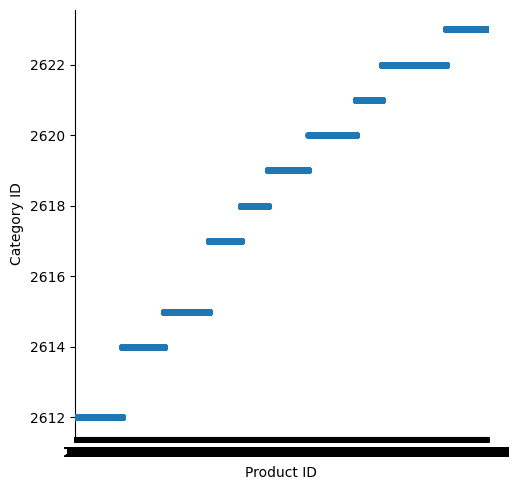

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_prod_text = df_text_normalized.copy();
df_retail_date = df_date_normalized.copy();
print(df_prod_text.columns)

#plt.figure()
#sns.boxplot(data=data_prod_price, x='Product ID', y=' Cluster ID')
#plt.title('Box plot of {Product ID}')
#plt.show()
sns.catplot(data=df_prod_text, x='Product ID', y='Category ID')
plt.show()

In [ ]:
df_text_normal_x = df_text_normalized.drop(columns=['Category ID'], axis=1)
df_text_normal_y = df_text_normalized['Category ID']

In [ ]:
print("Row: ", df_text_normalized.shape[0])
print(" Colunm: ", df_text_normalized.shape[1])

Row:  35311
 Colunm:  4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Split data into train/test set
X_train, X_test, Y_train, Y_test = train_test_split(df_text_normal_x, df_text_normal_y, test_size=0.3, random_state=2025) #stratify=y

#Train and evaluate a logistic resgression model
model = LogisticRegression(max_iter=df_text_normal_x.shape[0])
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
# Print the confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
# Print the classification report
print(classification_report(Y_test, Y_pred))

Model Accuracy: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f"Model Accuracy: {accuracy:.2f}")
# Print the confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
# Print the classification report
print(classification_report(Y_test, Y_pred))

Model Accuracy: 0.96
[[1109  104    0    0    0    0    0    0    0    0]
 [   0  778  271    0    0    0    0    0    0    0]
 [   0   34 1122    0    0    0    0    0    0    0]
 [   0    0    0  800    1    0    0    0    0    0]
 [   0    0    0    0  716    1    0    0    0    0]
 [   0    0    0    0    1 1062    0    0    0    0]
 [   0    0    0    0    0    0 1201    0    0    0]
 [   0    0    0    0    0    0   10  618    1    0]
 [   0    0    0    0    0    0    0    3 1649    0]
 [   0    0    0    0    0    0    0    0    4 1109]]


              precision    recall  f1-score   support

        2612       1.00      0.91      0.96      1213
        2614       0.85      0.74      0.79      1049
        2615       0.81      0.97      0.88      1156
        2617       1.00      1.00      1.00       801
        2618       1.00      1.00      1.00       717
        2619       1.00      1.00      1.00      1063
        2620       0.99      1.00      1.00      1201
        2621 

In [26]:
import numpy as np

#df_date_normalized = df_date_normalized.drop(columns=['Quantity','CustomerID','Country'])
print("Row: ", df_date_normalized.shape[0])
print(" Colunm: ", df_date_normalized.shape[1])
drop_indices = np.random.choice(df_date_normalized.index, 400000, replace=False)
df_subset = df_date_normalized.drop(drop_indices)
print(" After Row: ", df_subset.shape[0])

Row:  541909
 Colunm:  2
 After Row:  141909


In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity (important for ARIMA)
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print(df_subset.columns)
df_subset.set_index('InvoiceDate', inplace=True)
# If the p-value > 0.05 then the data is not stationary.
# Apply differencing if required.
check_stationarity(df_subset['UnitPrice'])

try:
  model = ARIMA(df_subset['UnitPrice'], order=(5,1,0)) # Example order, tune this!
  model_fit = model.fit()

  # Make predictions (example: for the next 10 steps)
  predictions = model_fit.predict(start=1, end=len(df_subset))
  print(predictions)

except Exception as e:
  print("Error during ARIMA model fitting:", e)

Index(['InvoiceDate', 'UnitPrice'], dtype='object')
ADF Statistic: -116.458107
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1         2.726372
2         3.409807
3         3.100109
4         2.787608
5         2.782070
            ...   
141905    1.629933
141906    2.075646
141907    2.510499
141908    3.036491
141909    3.491241
Name: predicted_mean, Length: 141909, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Evaluate the model (e.g., using RMSE)
print(f"RMSE: {rmse(df_subset['UnitPrice'], predictions)}")

# Calculate mean squared error
print(f"MSE: {mean_squared_error(df_subset['UnitPrice'], predictions)}")

RMSE: 86.94131074635256
MSE: 7558.791514293837
